In [1]:
#Lib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(palette='rainbow')

In [2]:
df = pd.read_csv('heart.csv')

In [3]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [5]:
df.shape

(303, 14)

In [6]:
# Target label

In [7]:
df['target'].value_counts()

1    165
0    138
Name: target, dtype: int64

In [8]:
#visualize the target for more explanation

Text(0, 0.5, 'Patient Count')

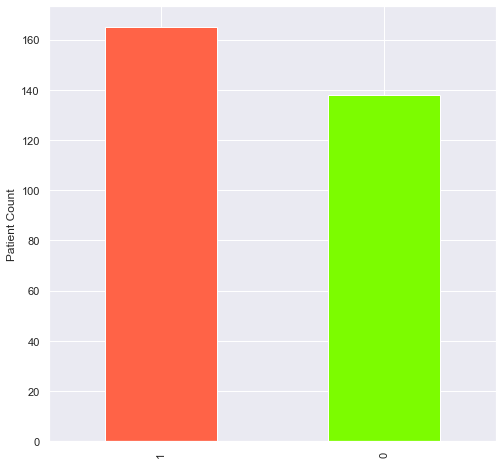

In [9]:
df['target'].value_counts().plot(kind='bar',figsize=(8,8),color=['tomato','lawngreen']);

plt.ylabel('Patient Count',fontsize=12)

#Red will refers as 1 = Heart Disease
#Green will refers as 0 = No heart Disease

In [10]:
#Checking the missing values

In [11]:
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [12]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [13]:
#Column Compare for better understanding

In [14]:
# df['sex'] to df['target']

In [15]:
df['sex'].value_counts() #1 = male; 0 = female

1    207
0     96
Name: sex, dtype: int64

In [16]:
df['target'].value_counts()

1    165
0    138
Name: target, dtype: int64

In [17]:
# using crosstab

In [18]:
sex_to_target = pd.crosstab(df['target'],df['sex'])

In [19]:
sex_to_target

sex,0,1
target,,
0,24,114
1,72,93


In [20]:
sex_to_target.columns = ['Female','Male']

In [21]:
sex_to_target.index = ['No','Yes']

In [22]:
sex_to_target #we can easily see how many male or female has heart disease and not heart disease

,Female,Male
No,24,114
Yes,72,93


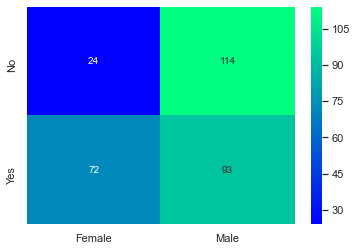

In [23]:

sns.heatmap(sex_to_target,annot=True,cmap='winter',fmt='');

In [24]:
#based on the data, about 65% of the male are most likely to have heart disease 
#where 75% of female are most likely to have heart disease 

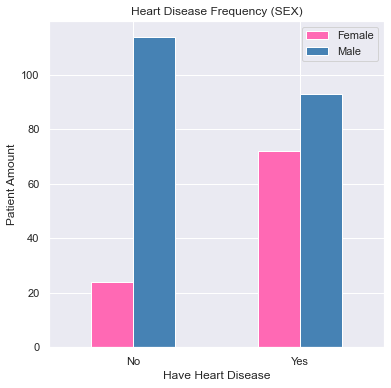

In [25]:
#visualize
sex_to_target.plot(figsize=(6,6),kind='bar',color=['hotpink','steelblue'])
plt.xlabel('Have Heart Disease',fontsize=12)
plt.ylabel('Patient Amount',fontsize=12)
plt.title('Heart Disease Frequency (SEX)')
plt.xticks(rotation=0)
plt.show()

In [26]:
#########
#Comparing more cloumns ['age','thalach'] to ['target']

In [27]:
df['thalach'].value_counts()

162    11
160     9
163     9
173     8
152     8
       ..
129     1
128     1
127     1
124     1
71      1
Name: thalach, Length: 91, dtype: int64

In [28]:
df['age'].value_counts

<bound method IndexOpsMixin.value_counts of 0      63
1      37
2      41
3      56
4      57
       ..
298    57
299    45
300    68
301    57
302    57
Name: age, Length: 303, dtype: int64>

In [29]:
#getting all Targeted and all Non-targeted ['age'] and ['thalach']
has_disease_age = df['age'][df['target'] == 1]
no_disease_age = df['age'][df['target']==0]

#thalch
has_disease_thalach = df['thalach'][df['target']==1]
no_disease_thalach = df['thalach'][df['target']==0]

In [30]:
# plotting all the ['age'] and ['thalach'] that has heart disease

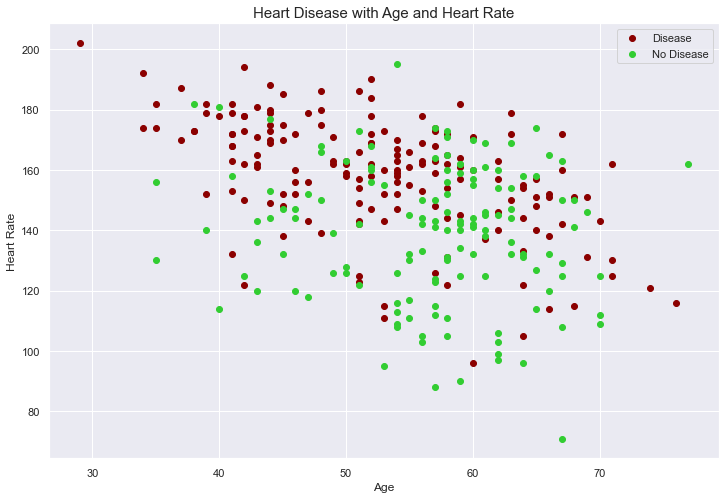

In [31]:
plt.figure(figsize=(12,8))

#positive
plt.scatter(has_disease_age,has_disease_thalach,c='darkred')

#negative
plt.scatter(no_disease_age,no_disease_thalach,c='limegreen')

plt.title('Heart Disease with Age and Heart Rate',fontsize=15)
plt.xlabel('Age')
plt.ylabel('Heart Rate')

plt.legend(['Disease','No Disease'])

plt.show()

In [32]:
#Checking the distribution of ages #

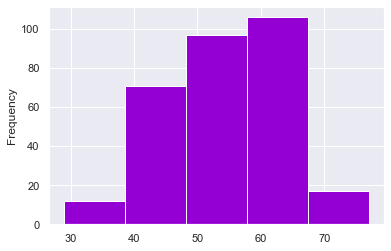

In [33]:
df['age'].plot.hist(color='darkviolet',bins=5);

In [34]:
# Exploring ['CP'] column to understanding, the explanitory power of Chest Pain to predict disease

* chest pain type (4 values)
  *  cp: chest pain type
   *  Value 1: typical angina
   *  Value 2: atypical angina
   *  Value 3: non-anginal pain
   *  Value 4: asymptomatic

In [35]:
pd.crosstab(df['cp'],df['target'])

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


In [36]:
cp_to_target = pd.crosstab(df['cp'],df['target'])
cp_to_target.columns = ['No','Yes']
cp_to_target.index = ['T_angina','AT_angina','Non_angina','Asymptomatic']

In [37]:
cp_to_target

,No,Yes
T_angina,104,39
AT_angina,9,41
Non_angina,18,69
Asymptomatic,7,16


In [38]:
#Visual CP

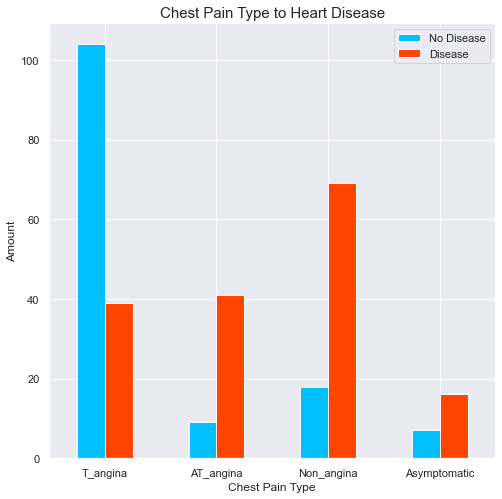

In [39]:
cp_to_target.plot(kind='bar',figsize=(8,8),color=['deepskyblue','orangered'])

plt.title('Chest Pain Type to Heart Disease',fontsize=15)

plt.xlabel('Chest Pain Type')
plt.ylabel('Amount')

plt.legend(['No Disease','Disease'])

plt.xticks(rotation=0)

plt.show()

In [40]:
######## CHecking the Co-Relation of the columns

In [41]:
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


In [42]:
#Seaborn heatmap

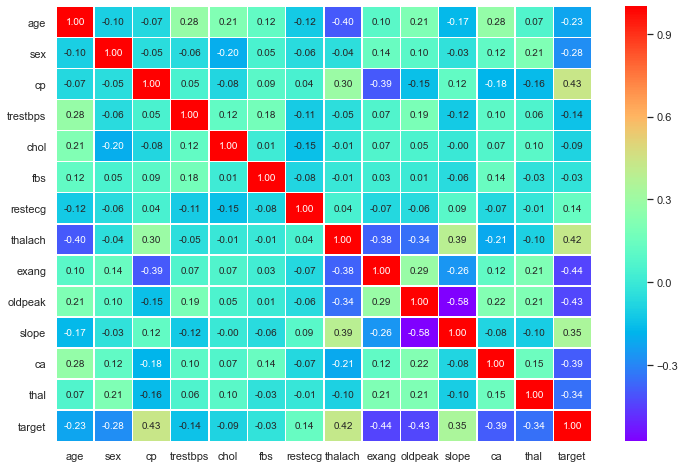

In [43]:
corr_matrix = df.corr()
fig,ax = plt.subplots(figsize=(12,8))

ax  = sns.heatmap(corr_matrix,annot=True,linewidths = 0.5, fmt ='.2f', cmap='rainbow' )

plt.show()

In [44]:
#positive corelation = if the value increase the target should increase
#negative corelation = if the value increase the target should drecrease
# zero means there is no corelation